# Mutual Funds

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import cluster

df = pd.read_csv('MutualFunds.csv')
df.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'initial_investment',
       'subsequent_investment', 'fund_category', 'fund_family',
       ...
       'peer_environment_avg', 'peer_environment_max', 'social_score',
       'peer_social_min', 'peer_social_avg', 'peer_social_max',
       'governance_score', 'peer_governance_min', 'peer_governance_avg',
       'peer_governance_max'],
      dtype='object', length=298)

In [ ]:
df.shape

(23783, 298)

In [ ]:
# filling nan

# calculate the mean of each column
mean = df.mean(numeric_only=True)
# fill NaN values with the mean of each column
df.fillna(mean, inplace=True)
df

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.000000,World Allocation,DWS,...,5.050000,10.580000,7.430000,5.980000,9.07000,11.300000,5.430000,4.260000,7.140000,8.11000
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,1015.925752,Health,Virtus,...,1.430000,3.270000,12.960000,9.520000,12.87000,15.080000,8.400000,4.960000,7.680000,10.30000
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.000000,Target-Date 2015,American Century Investments,...,4.357856,7.675547,8.043626,6.906983,9.34685,11.308239,6.210819,5.387539,7.219275,8.91738
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.000000,Large Growth,Thrivent Funds,...,2.700000,5.810000,10.130000,7.250000,10.14000,11.970000,8.030000,5.300000,7.540000,8.90000
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,1015.925752,Target-Date 2015,American Century Investments,...,4.357856,7.675547,8.043626,6.906983,9.34685,11.308239,6.210819,5.387539,7.219275,8.91738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,ZVNIX,MutualFund,US,Fidelity Advisor Small Cap Valu,Fidelity Advisor Small Cap Value Fund Class M,USD,50000.0,500.000000,Large Growth,Fidelity Investments,...,2.700000,5.810000,10.530000,7.250000,10.14000,11.970000,7.250000,5.300000,7.540000,8.90000
23779,VHYAX,MutualFund,US,Capital World Bond Fund - Class,American Funds Capital World Bond Fund Class 5...,USD,3000.0,1.000000,Large Value,American Funds,...,5.000000,9.110000,10.830000,7.040000,10.48000,12.420000,7.840000,5.830000,7.710000,9.30000
23780,VIAAX,MutualFund,US,Capital World Growth and Income,American Funds Capital World Growth and Income...,USD,3000.0,1.000000,Foreign Large Growth,American Funds,...,3.870000,6.220000,8.530000,7.250000,8.96000,11.960000,7.700000,5.790000,7.420000,8.78000
23781,VIHAX,MutualFund,US,Templeton China World Cl R6,Templeton China World Fund Class R6,USD,3000.0,1.000000,Foreign Large Value,Franklin Templeton Investments,...,5.350000,11.490000,9.550000,6.590000,9.24000,11.660000,8.790000,5.790000,8.100000,10.85000


# # Total Net Assets VS Year To Date Return

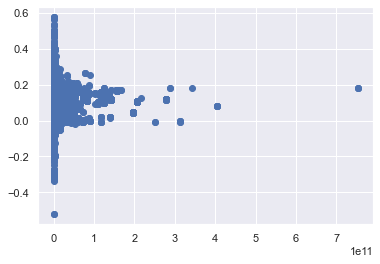

In [ ]:
plt.scatter(df['total_net_assets'],df['year_to_date_return'])
plt.show()

In [ ]:
x = df[['total_net_assets','year_to_date_return']]
kmeans = KMeans(4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

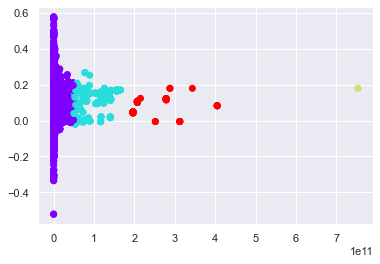

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['total_net_assets'],
            data_with_clusters['year_to_date_return'],
            c=data_with_clusters['Clusters'],
            cmap='rainbow')

# # Fund Alpha VS Fund Beta

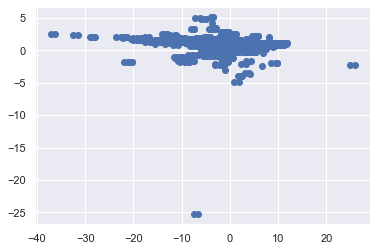

In [ ]:
plt.scatter(df['fund_alpha_10years'],df['fund_beta_10years'])
plt.show()

In [ ]:
x = df[['fund_alpha_10years','fund_beta_10years']]
kmeans = KMeans(4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 1, ..., 1, 1, 1], dtype=int32)

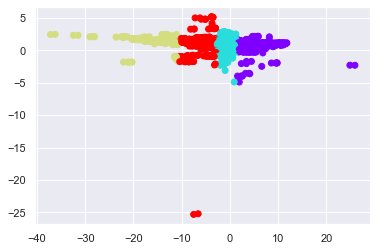

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['fund_alpha_10years'],data_with_clusters['fund_beta_10years'],c=data_with_clusters['Clusters'],cmap='rainbow')

# ETF

In [ ]:
df2 = pd.read_csv('ETFs.csv')
df2.describe()

,avg_vol_3month,avg_vol_10day,total_net_assets,day50_moving_average,day200_moving_average,week52_high_low_change,week52_high_low_change_perc,week52_high,week52_high_change,week52_high_change_perc,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
count,2.310000e+03,2.295000e+03,2.280000e+03,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2307.000000,2307.000000,...,1144.000000,1141.000000,1143.000000,608.000000,607.000000,608.000000,605.000000,608.000000,607.000000,608.000000
mean,5.100906e+05,6.800002e+05,2.479768e+09,48.640431,47.690390,12.803154,0.215996,53.567501,-6.120946,-0.107516,...,19.854003,0.505706,13.239869,-2.504901,0.710280,0.433289,63.547388,20.930082,0.362669,6.158717
std,3.114726e+06,4.289224e+06,2.251482e+10,46.343489,43.427157,20.106075,0.149696,50.634168,11.698566,0.124897,...,15.756235,0.520746,72.145489,8.978607,4.623362,1.284960,26.845096,15.013428,0.586071,20.754670
min,1.900000e+01,1.000000e+01,2.000000e+01,1.327000,1.325000,0.020000,0.000200,2.150000,-150.640000,-0.941720,...,0.250000,-2.080000,-196.640000,-70.590000,-88.800000,-7.950000,0.010000,0.240000,-2.550000,-314.770000
25%,4.538500e+03,3.620000e+03,2.666404e+07,26.143000,26.145000,3.550000,0.119350,28.400000,-5.877750,-0.120040,...,13.022500,0.350000,3.585000,-4.475000,0.780000,0.130000,48.980000,13.755000,0.080000,2.215000
50%,1.736500e+04,1.862000e+04,1.139096e+08,35.131000,34.604000,7.660000,0.203700,38.620000,-2.810000,-0.067940,...,16.640000,0.600000,9.400000,-0.750000,1.040000,0.570000,71.460000,17.470000,0.520000,6.970000
75%,9.313725e+04,1.122350e+05,5.799118e+08,55.046000,54.153000,14.335000,0.272940,60.410000,-1.385000,-0.036610,...,22.232500,0.780000,13.880000,1.505000,1.270000,1.082500,82.790000,24.712500,0.780000,11.985000
max,7.694046e+07,1.009386e+08,7.534100e+11,798.770000,694.434000,394.840000,1.000400,884.840000,-0.010000,-0.000100,...,146.440000,1.630000,2151.740000,38.200000,17.110000,5.260000,100.000000,143.790000,1.280000,246.080000


In [ ]:
# filling nan

# calculate the mean of each column
mean = df2.mean(numeric_only=True)
# fill NaN values with the mean of each column
df2.fillna(mean, inplace=True)
df2

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,19.854003,0.505706,13.239869,-2.504901,0.71028,0.433289,63.547388,20.930082,0.362669,6.158717
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.300000,0.620000,9.660000,3.320000,0.96000,0.790000,73.640000,16.780000,0.530000,8.150000
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.910000,0.660000,10.370000,0.300000,0.99000,0.550000,78.240000,16.830000,0.360000,4.810000
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,19.854003,0.505706,13.239869,-2.504901,0.71028,0.433289,63.547388,20.930082,0.362669,6.158717
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,19.854003,0.505706,13.239869,-2.504901,0.71028,0.433289,63.547388,20.930082,0.362669,6.158717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,...,16.880000,0.480000,6.570000,-0.500000,1.11000,0.550000,83.670000,18.280000,0.320000,3.940000
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,23.340000,0.700000,12.440000,-3.600000,1.40000,0.440000,59.310000,27.560000,0.170000,0.580000
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,19.270000,0.480000,6.510000,-0.580000,1.17000,0.570000,75.700000,20.300000,0.310000,3.600000
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,18.140000,0.610000,9.050000,-1.140000,1.00000,0.440000,76.010000,17.310000,0.270000,3.250000


# # fund_alpha_10years VS fund_beta_10years

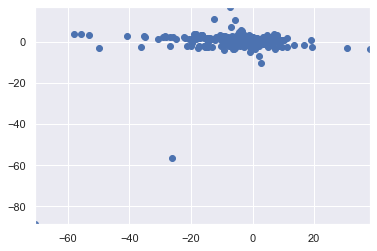

In [ ]:
plt.scatter(df2['fund_alpha_10years'],df2['fund_beta_10years'])
plt.xlim(min(df2['fund_alpha_10years']),max(df2['fund_alpha_10years']))
plt.ylim(min(df2['fund_beta_10years']),max(df2['fund_beta_10years']))
plt.show()

In [ ]:
x = df2[['fund_alpha_10years','fund_beta_10years']]
kmeans = KMeans(4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 0, ..., 0, 0, 3], dtype=int32)

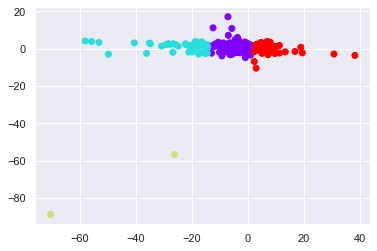

In [ ]:
data_with_clusters = df2.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['fund_alpha_10years'],data_with_clusters['fund_beta_10years'],c=data_with_clusters['Clusters'],cmap='rainbow')

# # Total_net_assets VS fund_yield

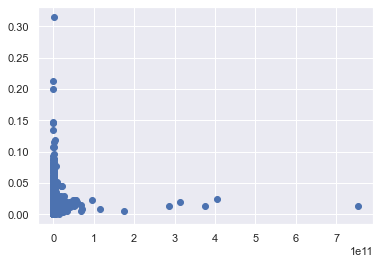

In [ ]:
plt.scatter(df2['total_net_assets'],df2['fund_yield'])
plt.show()

In [ ]:
x = df2[['total_net_assets','fund_yield']]
kmeans = KMeans(4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacky/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

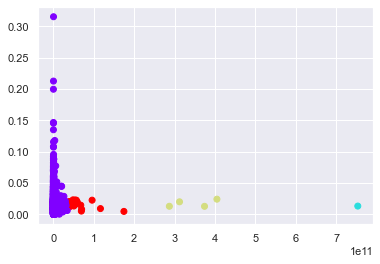

In [ ]:
data_with_clusters = df2.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['total_net_assets'],data_with_clusters['fund_yield'],c=data_with_clusters['Clusters'],cmap='rainbow')